<h1> TALLER 3 </h1>

<h2> Pruebas de contraste de uniformidad y aletoriedad </h2>

Importamos lo que vamos a necesitar:

In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Definimos nuestra función uniforme que nos retornará un vector de tamaño n con v.a. uniforme. se usan constantes de Borlandd C/C++ inicialmente con una semilla de 20 para empezar.

In [2]:
def uni(n):
    semilla = 20
    #Valores Borland C/C++
    a=22695477
    b=1
    m=2**32
    uVector = []
    #uVector.append( semilla / float(m) )
    for i in range(0,n):
    	rta = ( (a*semilla) + b ) % m
    	semilla = rta
    	u = rta / float(m)
    	uVector.append(u)
    #print uVector
    return uVector

<h2> Comprobación de Uniformidad </h2>

Vamos a analizar una función u(0,1) con v.a. como las siguientes.

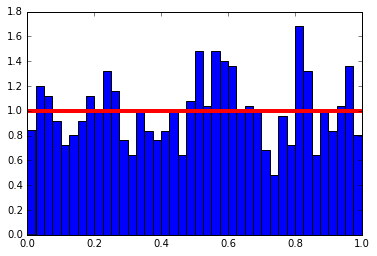

In [3]:
# Teoretical CDF for Uniform distribution F(x)
n = 1000
u = [1.0] * n
#print(u)

# Usamos nuestra función uniforme para generar nuestras v.a.
x = uni(n)

# Graficamos los datos normalizados.
count, bins, ignored = plt.hist(x, 40, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=4, color='r')
plt.show()

### Constraste o prueba de Kolmogorov-Smirnov

Vamos a implementar K-S.

('De = ', 0.24231471944989158)


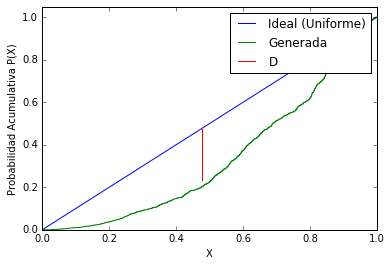

In [4]:
#Creamos nuestra función acumulativa ideal.
n1 = 1/float(n)
x1 = np.arange(n1,1+n1,n1)
y1 = np.cumsum(np.sort(u)/float(n))

#Creamos nuesta función acumulativa de nuestra uniforme creada.
x2 = np.sort(x)
y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

#Calculamos diferencia de distancias con el valor absoluto de las diferencias de cada pareja de puntos de las dos funciones.
De=np.absolute(y2-y1)

#Hallamos el valor De.
print("De = ",np.max(De))

#Graficamos las dos funciones y adicionalmente la distancia De hallada y sus puntos que la generan.
plt.plot(x1,y1,label='Ideal (Uniforme)')
plt.step(x2,y2,label='Generada')

#Buscamos los puntos que generan la distancia máxima de De.
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

plt.legend()
plt.xlabel('X')
plt.ylabel('Probabilidad Acumulativa P(X)')
plt.ylim(0, 1.05)

plt.show()

Ahora usamos SciPy para hallar el valor D y así comparar con el nuestro (De).

In [5]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print("D = ", D)
print("p-value = ", float(pvalue))


('D = ', 0.24231471944989119)
('p-value = ', 0.0)


Y así podemos observar que nuestro De es igual al valor D hallado de forma automática por SciPy.

### Contraste o prueba  $\chi^{2}$

gráfica sin normalizar: 


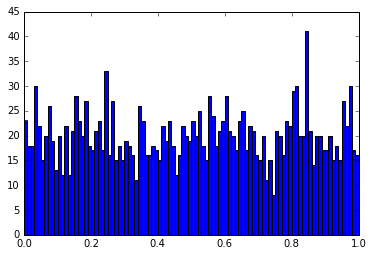

El valor de Chi cuadrado: 131.8


In [6]:
# Graficamos los datos.
#Cantidad de clases disjuntas con amplitud 1/k.
k = 100  
n = 2000
#El ejeX tiene un valor extra que se agrega para poder graficar en Histograma, en comparación con el ejeY.
#EjeY representa frecuencias o cantidad de valores que hay en ese bloque del EjeX.
print "gráfica sin normalizar: "
ejeY, ejeX, ignored = plt.hist(uni(n), k)   #Usamos la función uni(n) para retornar n valores aleatorios declarada al inicio.
plt.show()

t = []
e = n/float(k)
for i in range(1,k+1):
    t.append((float(ejeY[i-1]-e)**2)/float(e))
    
T = np.cumsum(t)
print "El valor de Chi cuadrado: "+str(max(T))